 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
portfolio_whale = pd.read_csv(whale_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
portfolio_whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# CHECK DATATYPE
portfolio_whale['SOROS FUND MANAGEMENT LLC'].dtype

dtype('float64')

In [4]:
# Drop nulls
whale_returns = portfolio_whale.dropna()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [5]:
# Cumulative Returns for Whale
cumulative_whale = (1 + whale_returns).cumprod() - 1
cumulative_whale

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383
2015-03-05,0.004981,0.002314,-0.000681,0.004327
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466
...,...,...,...,...
2019-04-25,0.166895,-0.220575,-0.146676,0.550964
2019-04-26,0.176404,-0.213434,-0.136133,0.567147
2019-04-29,0.177880,-0.211295,-0.130733,0.575332


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
portfolio_algo = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
portfolio_algo.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
portfolio_algo.isnull().sum(axis = 0)


Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns = portfolio_algo.dropna()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [9]:
#Cumilative returns algo
cumulative_algo = (1 + algo_returns).cumprod() - 1
cumulative_algo

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.005927,0.021679
2014-06-09,0.000885,0.027470
2014-06-10,0.005295,0.026714
2014-06-11,0.010081,0.022852
...,...,...
2019-04-25,1.145762,0.458997
2019-04-26,1.152159,0.466665
2019-04-29,1.163367,0.470814


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
portfolio_spy = pd.read_csv(sp500_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
portfolio_spy.head()


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [11]:
# Check Data Types


In [12]:
# Fix Data Types
portfolio_spy['Close'] = portfolio_spy['Close'].str.replace('$', '')
portfolio_spy.head()

#convert values to float
portfolio_spy['Close'] = portfolio_spy['Close'].astype('float')
# portfolio_spy['Close'].dtype

In [13]:
# Calculate Daily Returns
spy_returns = portfolio_spy.pct_change().dropna()
spy_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [14]:
# Drop nulls
spy_returns.isnull()



,Close
Date,
2019-04-22,False
2019-04-18,False
2019-04-17,False
2019-04-16,False
2019-04-15,False
...,...
2012-10-05,False
2012-10-04,False
2012-10-03,False


In [15]:
# Rename Column
spy_returns.rename(columns={
    "Close":"SPY Returns"
}, inplace = True)

spy_returns.head()

,SPY Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [16]:
# Cumulative returns SPY
cumulative_spy = (1 + spy_returns).cumprod() - 1
cumulative_spy

,SPY Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.009766
2019-04-17,-0.011327
2019-04-16,-0.009074
2019-04-15,-0.009578
...,...
2012-10-05,-0.502015
2012-10-04,-0.501854
2012-10-03,-0.505403


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Concatenate all DataFrames into a single DataFrame for daily returns
combine_portfolio = pd.concat([spy_returns, algo_returns, whale_returns], axis="columns", join="inner")
combine_portfolio.head()

,SPY Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-22,-0.008764,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-18,-0.001011,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916
2019-04-17,-0.001577,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-16,0.002279,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-15,-0.000509,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492


In [18]:
# concatenate all dataframes into single dataframe for cumulative returns
combine_portfolio_cumulative = pd.concat([cumulative_spy, cumulative_algo, cumulative_whale], axis="columns", join="inner")
combine_portfolio_cumulative.head()

,SPY Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-22,-0.008764,1.131361,0.455062,0.156280,-0.223061,-0.144348,0.533046
2019-04-18,-0.009766,1.129920,0.457884,0.159278,-0.217322,-0.141222,0.534716
2019-04-17,-0.011327,1.131173,0.459678,0.157602,-0.218277,-0.141721,0.531781
2019-04-16,-0.009074,1.153355,0.467349,0.160965,-0.213189,-0.137920,0.526861
2019-04-15,-0.009578,1.168414,0.463107,0.157839,-0.213494,-0.137203,0.525584


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

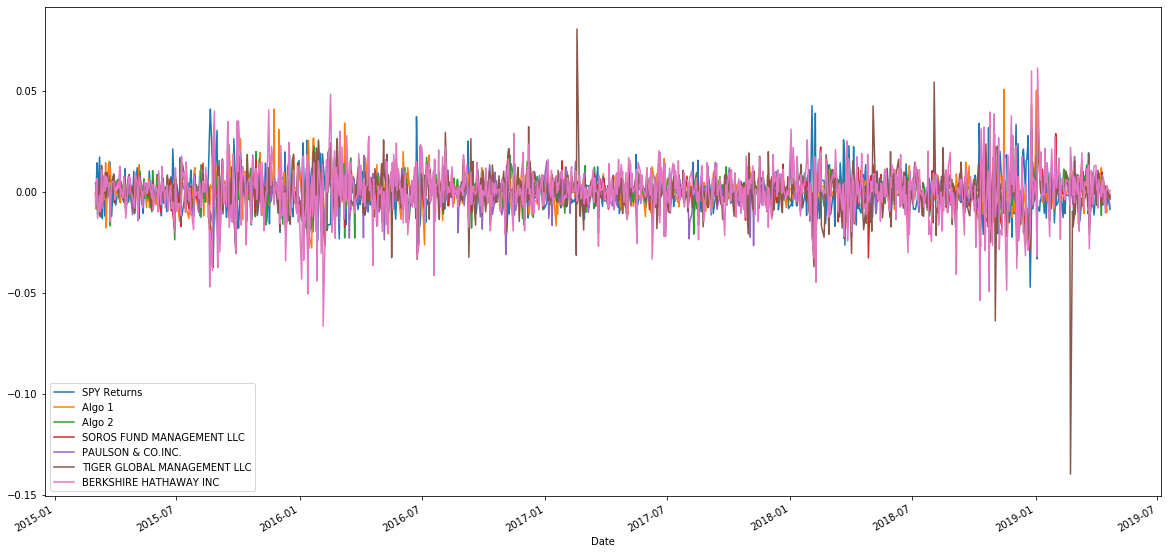

In [19]:
# Plot daily returns
combine_portfolio.plot(figsize=(20, 10))

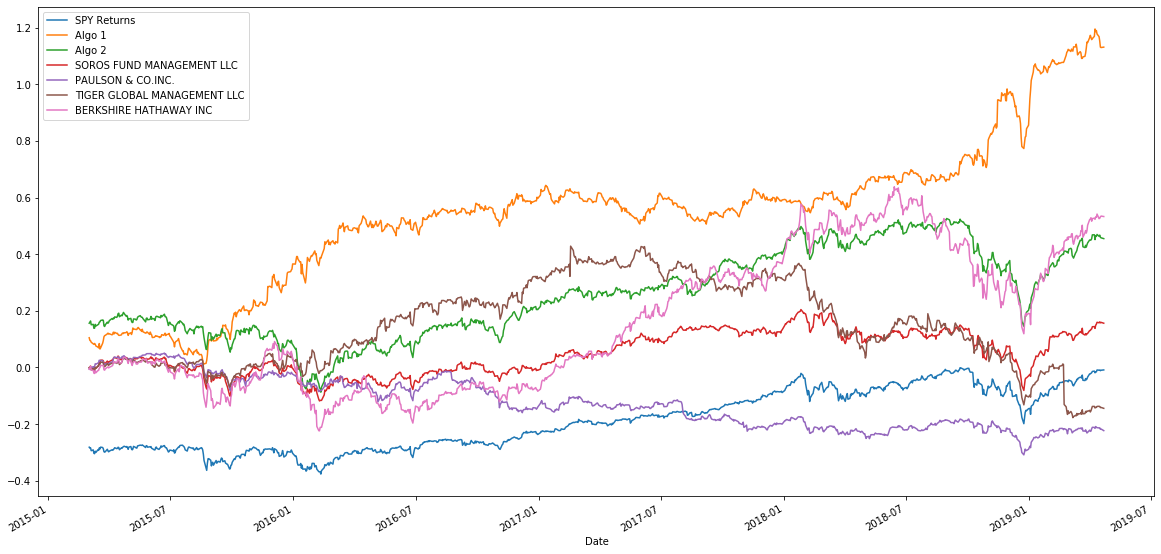

In [20]:
# Plot cumulative returns
combine_portfolio_cumulative.plot(figsize=(20, 10))

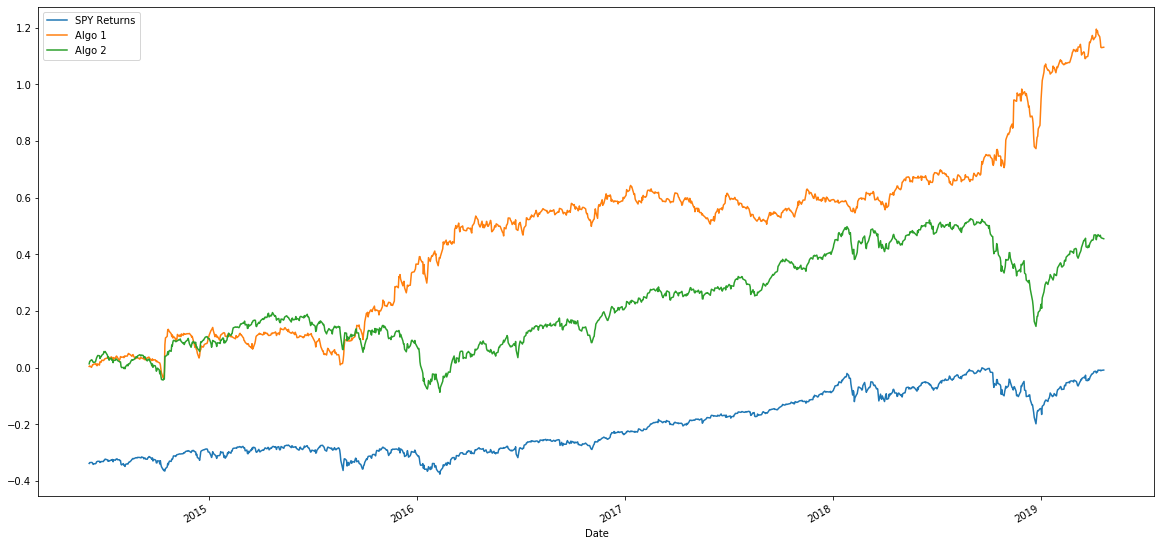

In [21]:
#Testing for algo
test_algo = pd.concat([cumulative_spy, cumulative_algo], axis="columns", join="inner")
test_algo.plot(figsize=(20, 10))

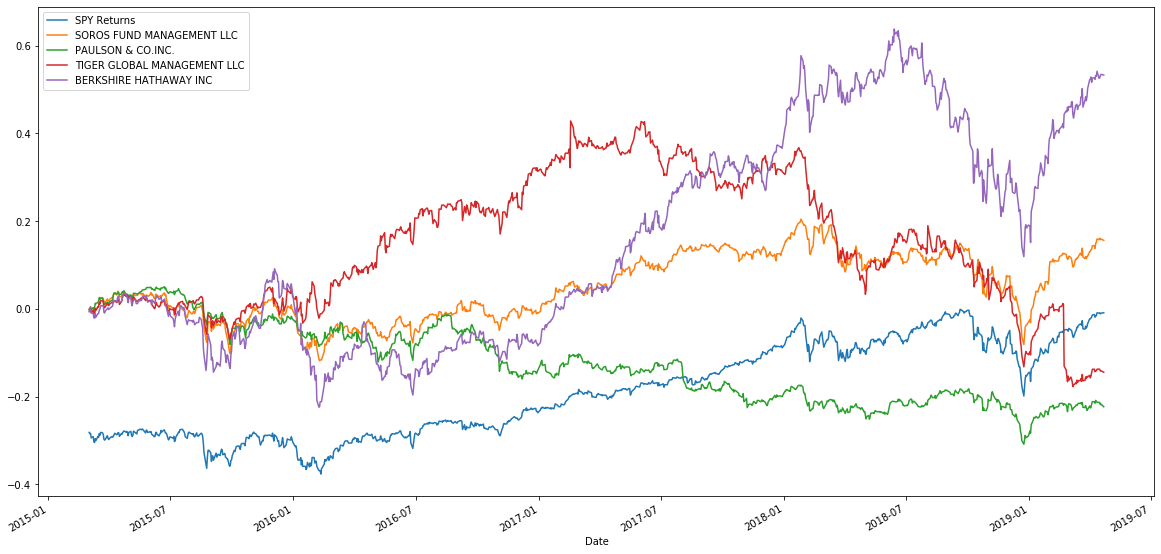

In [22]:
#Testing for whale
test_whale = pd.concat([cumulative_spy, cumulative_whale], axis="columns", join="inner")
test_whale.plot(figsize=(20, 10))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

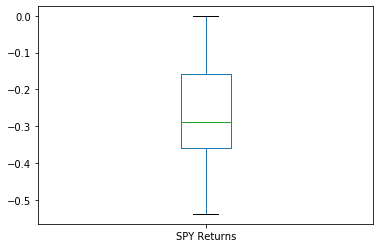

In [23]:
# Box plot to visually show risk for SPY
cumulative_spy.plot.box()

In [24]:
#finding spread of spy
cumulative_spy.describe()

,SPY Returns
count,1648.000000
mean,-0.265835
std,0.136956
min,-0.538692
25%,-0.359192
50%,-0.287918
75%,-0.157111
max,-0.000999


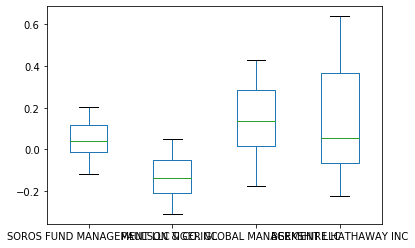

In [25]:
# Box plot to visually show risk for Whale
cumulative_whale.plot.box()

In [26]:
#spread of whale
cumulative_whale.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
count,1059.000000,1059.000000,1059.000000,1059.000000
mean,0.049883,-0.123942,0.146284,0.159732
std,0.073730,0.088385,0.151043,0.242778
min,-0.118299,-0.308636,-0.177201,-0.223768
25%,-0.010916,-0.207762,0.016063,-0.064677
50%,0.040493,-0.135664,0.138139,0.057278
75%,0.119133,-0.050068,0.284809,0.364337
max,0.204573,0.050682,0.428464,0.638119


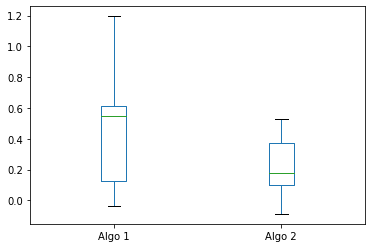

In [27]:
# Box plot to visually show risk for algo
cumulative_algo.plot.box()

In [28]:
#spread of algo
cumulative_algo.describe()

,Algo 1,Algo 2
count,1235.000000,1235.000000
mean,0.469760,0.228900
std,0.294720,0.159139
min,-0.037061,-0.087253
25%,0.127517,0.097729
50%,0.545455,0.181145
75%,0.611602,0.370561
max,1.195434,0.526028


In [29]:
# Daily Standard Deviation for SPY
daily_std_spy = spy_returns.std()
daily_std_spy.head()

SPY Returns    0.008135
dtype: float64

In [30]:
# Daily Standard Deviation for Whale
daily_std_whale = whale_returns.std()
daily_std_whale.head()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [31]:
# Daily Standard Deviation for Algo
daily_std_algo = algo_returns.std()
daily_std_algo.head()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE

In [32]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE

In [33]:
# Calculate the annualized standard deviation (252 trading days) FOR SPY
annualized_std_spy = daily_std_spy * np.sqrt(252)
annualized_std_spy.head()

SPY Returns    0.129133
dtype: float64

In [34]:
# Calculate the annualized standard deviation (252 trading days) FOR WHALE
annualized_std_whale = daily_std_whale * np.sqrt(252)
annualized_std_whale.head()

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

In [35]:
# Calculate the annualized standard deviation (252 trading days) FOR ALGO
annualized_std_algo = daily_std_algo * np.sqrt(252)
annualized_std_algo.head()

Algo 1    0.126801
Algo 2    0.134401
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

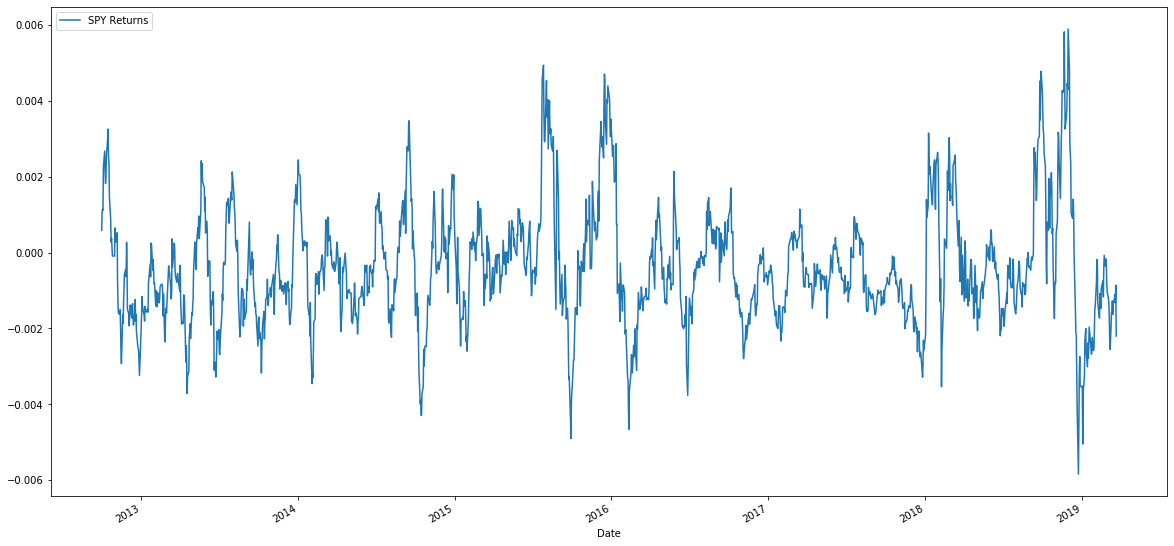

In [36]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
spy_returns.rolling(window=21).mean().plot(figsize=(20, 10))

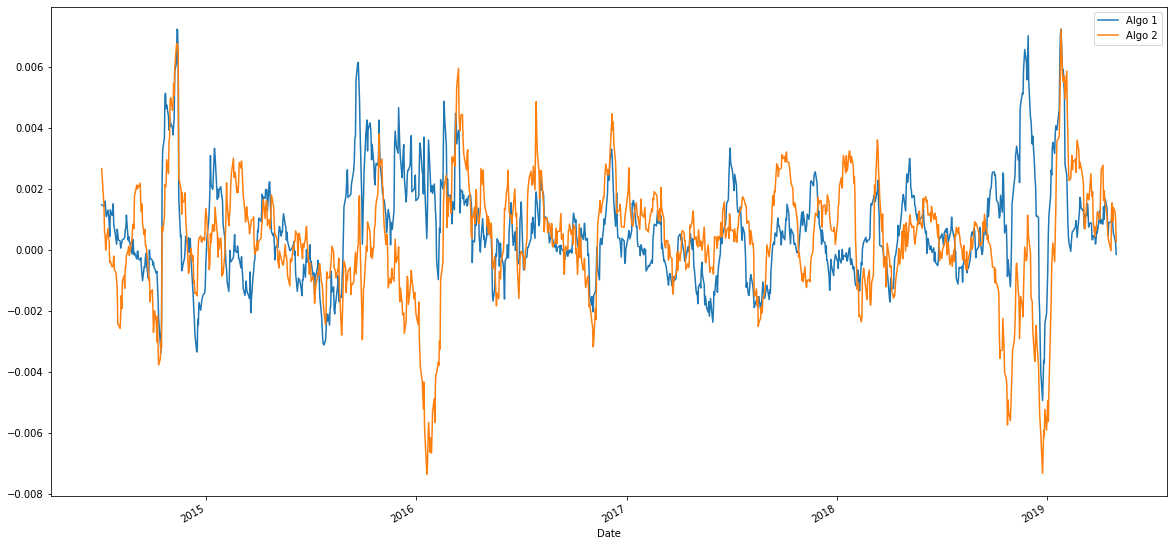

In [37]:
# Calculate and plot the rolling standard deviation for the Algo using a 21 day window
algo_returns.rolling(window=21).mean().plot(figsize=(20, 10))

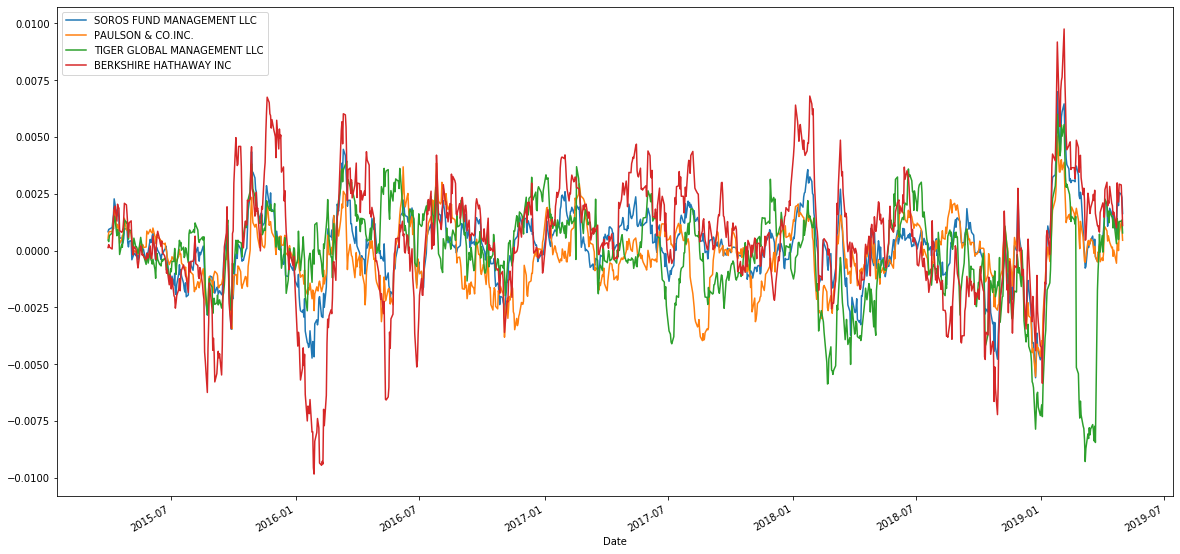

In [38]:
# Calculate and plot the rolling standard deviation for the Algo using a 21 day window
whale_returns.rolling(window=21).mean().plot(figsize=(20, 10))

In [39]:
# Correlation
spy_correlation = combine_portfolio.corr()
spy_correlation

,SPY Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
SPY Returns,1.000000,-0.033963,-0.002192,0.000574,0.013549,-0.001505,-0.013856
Algo 1,-0.033963,1.000000,0.287852,0.320901,0.268631,0.164114,0.291678
Algo 2,-0.002192,0.287852,1.000000,0.826730,0.678085,0.507160,0.687756
SOROS FUND MANAGEMENT LLC,0.000574,0.320901,0.826730,1.000000,0.699823,0.561040,0.754157
PAULSON & CO.INC.,0.013549,0.268631,0.678085,0.699823,1.000000,0.434308,0.545451
TIGER GLOBAL MANAGEMENT LLC,-0.001505,0.164114,0.507160,0.561040,0.434308,1.000000,0.424125
BERKSHIRE HATHAWAY INC,-0.013856,0.291678,0.687756,0.754157,0.545451,0.424125,1.000000


In [40]:
# Calculate covariance of soros fund and spy
covariance = combine_portfolio['SPY Returns'].cov(combine_portfolio['SOROS FUND MANAGEMENT LLC'])
covariance

3.8897269830639085e-08

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [41]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [42]:
#Sharpe ratio for combined portfolio
sharpe_ratios = (combine_portfolio.mean() * 252) / (combine_portfolio.std() * np.sqrt(252))
sharpe_ratios


SPY Returns                   -0.518582
Algo 1                         1.369589
Algo 2                         0.484334
SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
dtype: float64

In [43]:
 # plot() these sharpe ratios using a barplot.
 # On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

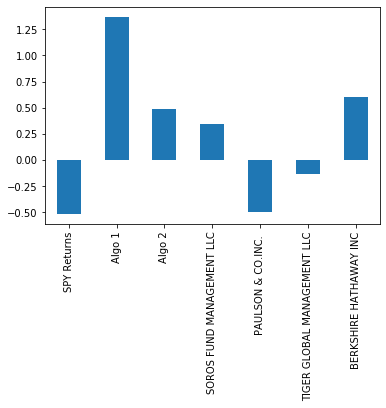

In [44]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind ="bar")

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [45]:
# Read the AMAZON csv
amzn_returns_csv = Path("Resources/amzn_historical.csv")
portfolio_amzn = pd.read_csv(amzn_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
portfolio_amzn.head()

,Close
Date,
2018-01-02,1189.01
2018-01-03,1204.20
2018-01-04,1209.59
2018-01-05,1229.14
2018-01-08,1246.87


In [46]:
#Cacluate daily returns
amzn_returns = portfolio_amzn.pct_change().dropna()
amzn_returns.head()

,Close
Date,
2018-01-03,0.012775
2018-01-04,0.004476
2018-01-05,0.016163
2018-01-08,0.014425
2018-01-09,0.004676


In [47]:
amzn_returns.rename(columns={
    "Close":"Amazon Returns"
}, inplace = True)

amzn_returns.head()

,Amazon Returns
Date,
2018-01-03,0.012775
2018-01-04,0.004476
2018-01-05,0.016163
2018-01-08,0.014425
2018-01-09,0.004676


In [48]:
# Read the NVIDIA csv
nvda_returns_csv = Path("Resources/nvda_historical.csv")
portfolio_nvda = pd.read_csv(nvda_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
portfolio_nvda.head()

,Close
Date,
2018-01-02,199.35
2018-01-03,212.47
2018-01-04,213.59
2018-01-05,215.40
2018-01-08,222.00


In [49]:
#Cacluate daily returns
nvda_returns = portfolio_nvda.pct_change().dropna()
nvda_returns.head()

,Close
Date,
2018-01-03,0.065814
2018-01-04,0.005271
2018-01-05,0.008474
2018-01-08,0.030641
2018-01-09,-0.000270


In [50]:
nvda_returns.rename(columns={
    "Close":"Nvidia Returns"
}, inplace = True)

nvda_returns.head()

,Nvidia Returns
Date,
2018-01-03,0.065814
2018-01-04,0.005271
2018-01-05,0.008474
2018-01-08,0.030641
2018-01-09,-0.000270


In [51]:
# Read the starbucks Stock
sbux_returns_csv = Path("Resources/starbuck_historical.csv")
portfolio_sbux = pd.read_csv(sbux_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
portfolio_sbux.head()

,Close
Date,
2018-01-02,57.63
2018-01-03,58.71
2018-01-04,58.93
2018-01-05,59.61
2018-01-08,59.31


In [52]:
#Cacluate daily returns
sbux_returns = portfolio_sbux.pct_change().dropna()
sbux_returns.head()

,Close
Date,
2018-01-03,0.018740
2018-01-04,0.003747
2018-01-05,0.011539
2018-01-08,-0.005033
2018-01-09,-0.002192


In [53]:
sbux_returns.rename(columns={
    "Close":"Starbucks Returns"
}, inplace = True)

sbux_returns.head()

,Starbucks Returns
Date,
2018-01-03,0.018740
2018-01-04,0.003747
2018-01-05,0.011539
2018-01-08,-0.005033
2018-01-09,-0.002192


In [54]:
# Concatenate all stocks into a single DataFrame
combine_portfolio_custom = pd.concat([amzn_returns, nvda_returns, sbux_returns], axis="columns", join="inner")
combine_portfolio_custom.head()

,Amazon Returns,Nvidia Returns,Starbucks Returns
Date,,,
2018-01-03,0.012775,0.065814,0.018740
2018-01-04,0.004476,0.005271,0.003747
2018-01-05,0.016163,0.008474,0.011539
2018-01-08,0.014425,0.030641,-0.005033
2018-01-09,0.004676,-0.000270,-0.002192


In [55]:
# Reset the index
# YOUR CODE HERE

In [56]:
# Drop Nulls
combine_portfolio_custom.isnull()

,Amazon Returns,Nvidia Returns,Starbucks Returns
Date,,,
2018-01-03,False,False,False
2018-01-04,False,False,False
2018-01-05,False,False,False
2018-01-08,False,False,False
2018-01-09,False,False,False
...,...,...,...
2018-12-21,False,False,False
2018-12-24,False,False,False
2018-12-26,False,False,False


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [57]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]

weighted_portfolio = combine_portfolio_custom.dot(weights)
weighted_portfolio.head()

Date
2018-01-03    0.032443
2018-01-04    0.004498
2018-01-05    0.012059
2018-01-08    0.013344
2018-01-09    0.000738
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [58]:
massive_portfolio = pd.concat([combine_portfolio, combine_portfolio_custom],axis = 'columns', join = "inner")
massive_portfolio.head()

,SPY Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Amazon Returns,Nvidia Returns,Starbucks Returns
Date,,,,,,,,,,
2018-12-28,-0.008421,0.014664,0.011664,0.001145,0.000863,-0.004019,-0.006178,0.011207,0.018907,0.003006
2018-12-27,0.001243,0.001571,0.000494,0.004184,-0.007472,0.009149,0.004813,-0.006295,-0.014500,0.001902
2018-12-26,-0.008490,0.022750,0.030822,0.042977,0.029338,0.030958,0.059909,0.094452,0.047372,0.041612
2018-12-24,-0.047250,-0.003938,-0.014745,-0.019152,-0.011786,-0.029165,-0.020181,-0.024313,-0.019217,-0.013520
2018-12-21,0.027868,-0.017888,-0.021636,-0.022720,-0.020980,-0.022570,-0.028892,-0.057077,-0.040933,-0.012228


In [59]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
massive_portfolio.isnull()

,SPY Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Amazon Returns,Nvidia Returns,Starbucks Returns
Date,,,,,,,,,,
2018-12-28,False,False,False,False,False,False,False,False,False,False
2018-12-27,False,False,False,False,False,False,False,False,False,False
2018-12-26,False,False,False,False,False,False,False,False,False,False
2018-12-24,False,False,False,False,False,False,False,False,False,False
2018-12-21,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2018-01-09,False,False,False,False,False,False,False,False,False,False
2018-01-08,False,False,False,False,False,False,False,False,False,False
2018-01-05,False,False,False,False,False,False,False,False,False,False


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [60]:
# Risk
sharpe_ratios_combined = (massive_portfolio.mean() * 252) / (massive_portfolio.std() * np.sqrt(252))
sharpe_ratios_combined

SPY Returns                    0.550809
Algo 1                         1.284929
Algo 2                        -1.167977
SOROS FUND MANAGEMENT LLC     -1.050191
PAULSON & CO.INC.             -1.128868
TIGER GLOBAL MANAGEMENT LLC   -1.799462
BERKSHIRE HATHAWAY INC        -0.606529
Amazon Returns                 0.789366
Nvidia Returns                -0.567268
Starbucks Returns              0.526757
dtype: float64

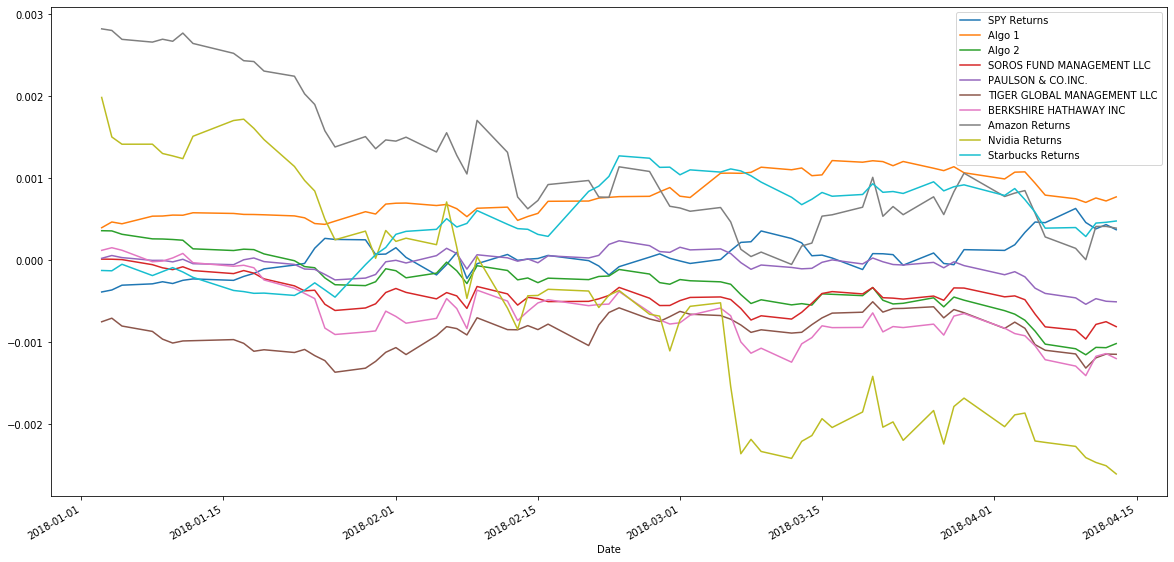

In [61]:
# Rolling
massive_portfolio.rolling(window=180).mean().plot(figsize=(20, 10))

In [62]:
# Beta
covariance = massive_portfolio['Nvidia Returns'].cov(massive_portfolio['SPY Returns'])


variance = massive_portfolio['Nvidia Returns'].var()


nvda_beta = covariance / variance
nvda_beta

-0.015383227784124669

In [63]:
# Annualzied Sharpe Ratios
sharpe_ratios_combined = (massive_portfolio.mean() * 252) / (massive_portfolio.std() * np.sqrt(252))
sharpe_ratios_combined

SPY Returns                    0.550809
Algo 1                         1.284929
Algo 2                        -1.167977
SOROS FUND MANAGEMENT LLC     -1.050191
PAULSON & CO.INC.             -1.128868
TIGER GLOBAL MANAGEMENT LLC   -1.799462
BERKSHIRE HATHAWAY INC        -0.606529
Amazon Returns                 0.789366
Nvidia Returns                -0.567268
Starbucks Returns              0.526757
dtype: float64

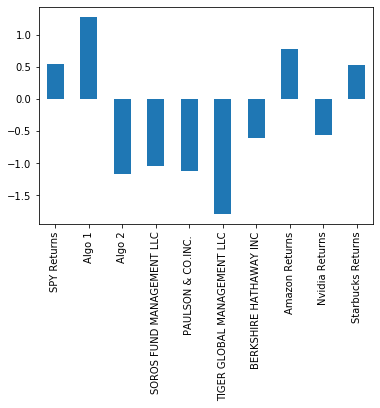

In [64]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_combined.plot(kind ="bar")

## Include correlation analysis to determine which stocks (if any) are correlated

In [65]:
# YOUR CODE HERE